#### Hi all.  🙋‍♂️ 

#### I have recently published [Beginner Friendly Detailed Explained EDAs – For anyone at the beginnings of DS/ML journey](https://www.kaggle.com/general/253911#1393015) series.

#### After getting positive feedback and requests for Beginner-Intermediate Friendly Machine Learning series, I started to publish the Machine Learning Basic Series, which would help anyone who wants to learn or refresh the basics of ML.

#### What we have covered: 

#### [BIAS & VARIANCE TRADEOFF](https://www.kaggle.com/kaanboke/ml-basics-bias-variance-tradeoff) ✔️

#### [LINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/ml-basics-linear-algorithms)  ✔️

#### [NONLINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/nonlinear-algorithms)  ✔️

#### [The Most Used Methods to Deal with MISSING VALUES](https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values)  ✔️

#### By this post, we are starting to implement machine learning algorithms.

#### In this notebook we will step by step implement end to end machine learning project.

#### We will use **classification algorithms with imbalanced data**, which will be very fun. **Enjoy** 🤘



![](https://media.giphy.com/media/tkYpAbKdWj4TS/giphy.gif)

gif credit: https://giphy.com

#### **By the way, when you like the topic, you can show it by supporting** 👍

####  **Feel free to leave a comment in the notebook**. 


#### All the best 🤘

![](https://miro.medium.com/max/1400/1*FUZS9K4JPqzfXDcC83BQTw.png)

Image Credit: https://miro.medium.com/

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [Data](#0)
* [Exploratory Data Analysis](#1)
    * [Insights from the First Glance](#2)
    * [What Problem We Have?](#3)
    * [Target Variable](#4)
    * [Imbalance Data](#5)
    * [Decide the Metric](#6)
    * [Missing Values](#7)
    * [Numerical Features](#8)
    * [Categorical Features](#9)    
    * [Bivariate Analysis](#10)
    * [Insights from the Exploratory Data Analysis](#11)
    
    
* [Model Selection](#12)    
    * [Load the Data](#13)
    * [Our Evaluation Model](#14)
    * [Baseline Model](#15)
    * [Our Models](#16)
    * [Analyze the Models](#17)    
    * [Visualize the Results](#18)
    * [Our First Model](#19)    
    * [Our Second Model with SMOTE](#20)


* [Conclusion](#21)

* [References & Further Reading](#22)


<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

#### Stroke Prediction Dataset

![](https://expertchikitsa.com/wp-content/uploads/2017/05/stroke.jpg)

image credit : https://expertchikitsa.com

**Context**

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1. **id**: unique identifier

2. **gender**: "Male", "Female" or "Other"

3. **age**: age of the patient

4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. **ever_married**: "No" or "Yes"

7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. **Residence_type**: "Rural" or "Urban"

9. **avg_glucose_level**: average glucose level in blood

10. **bmi**: body mass index

11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. **stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Reference: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset 

<a id="1"></a>
<font color="lightseagreen" size=+2.5><b>Exploratory Data Analysis</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Let's import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 



from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

- Read csv and see the top 5 instances of the data

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df=df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

 We have 5110 instances with the 10 features and 1 output variable


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<a id="2"></a>
<font color="lightseagreen" size=+1.5><b>Insights from the First Glance</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- In our dataset, we have both numerical and categorical variables.
- It is essential to see whether columns are correctly inferred.
- The most important one to look for is our target variable 'stroke'
- 'Stroke' is detected as an integer, not as an object.
- Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)
- Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object. 
- Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease) 
- And 0 for the negative cases (does not have hypertension/heart disease)
- We don't need to change them, but it is good to see and be aware of it.
- In addition to them, we have 3 categorical variables, which we have to encode as numerical.

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>What Problem We Have?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- We have binary classification problem.
- We make prection on the target variable **STROKE**
- And we will build a model to get best prediction on the stroke variable.

> 

<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Target Variable</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [6]:
y = df['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.87 --> (249 patient)
Percentage of patient did not have a stroke: % 95.13 --> (4861 patient)


- Almost %95 of the instances of our target variable is 'No stroke'
-  4861 patient does not have a stroke
- %5  of the instances of our target variable is 'Stroke'
- 249 patient have a stroke.

- We have imbalanced data.

In [7]:
fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

- Our  stroke dataset is an example of a so-called imbalanced dataset.
- There are 19 times more people who didn’t have stroke in our data than who had, and we say that the non-stroke class dominates the stroke class.
- We can clearly see that: the stroke rate in our data is 0.048
- Which is a strong indicator of class imbalance

<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>Imbalance Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Instances across classes are imbalanced, like in our dataset, we have imbalance data.

- The problem is, most of the machine learning algorithm do not work well with the imbalanced data.

- Some of the metrics (like accuracy) give us misleading results.

- Most of the time in classification problems our interest is to get better predict on the minority class.

- In our example: People had a stroke is minority class.

- Otherwise our machine learning algorithm falsely predicts majority class.

- In our example: No stroke is majority class.

<a id="6"></a>
<font color="lightseagreen" size=+1.5><b>Decide the Metric</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- This is the first step when approaching a machine learning problem: decide the metric!

- The choice of the wrong metric can mean choosing the wrong algorithm.

- We see that the target is skewed and thus the best metric for this binary classification problem would be Area Under the ROC Curve (AUC). 
- We can use precision and recall too, but AUC combines these two metrics.

- We have already seen the label/target distribution, and we know that it is a binary classification problem with skewed targets. Thus, we will be using StratifiedKFold to split the data

- Just for further info, it is not advisable to use accuracy as an evaluation metric, when dealing with higly imbalanced data. 

<a id="7"></a>
<font color="lightseagreen" size=+1.5><b>Missing Values</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Look for the detailed info on the missing values  ---> **[The Most Used Methods to Deal with MISSING VALUES](https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values)**

In [8]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
bmi,201,0.039335
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


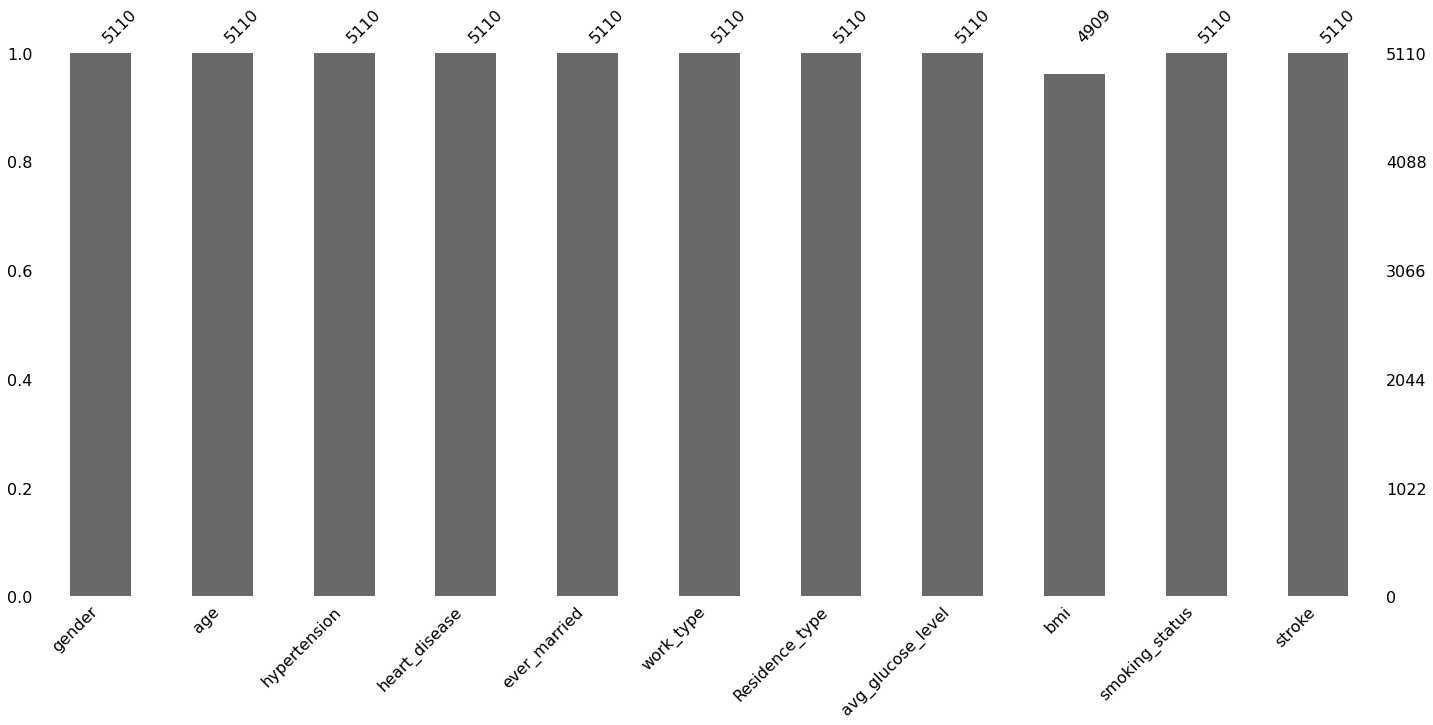

In [9]:
msno.bar(df);

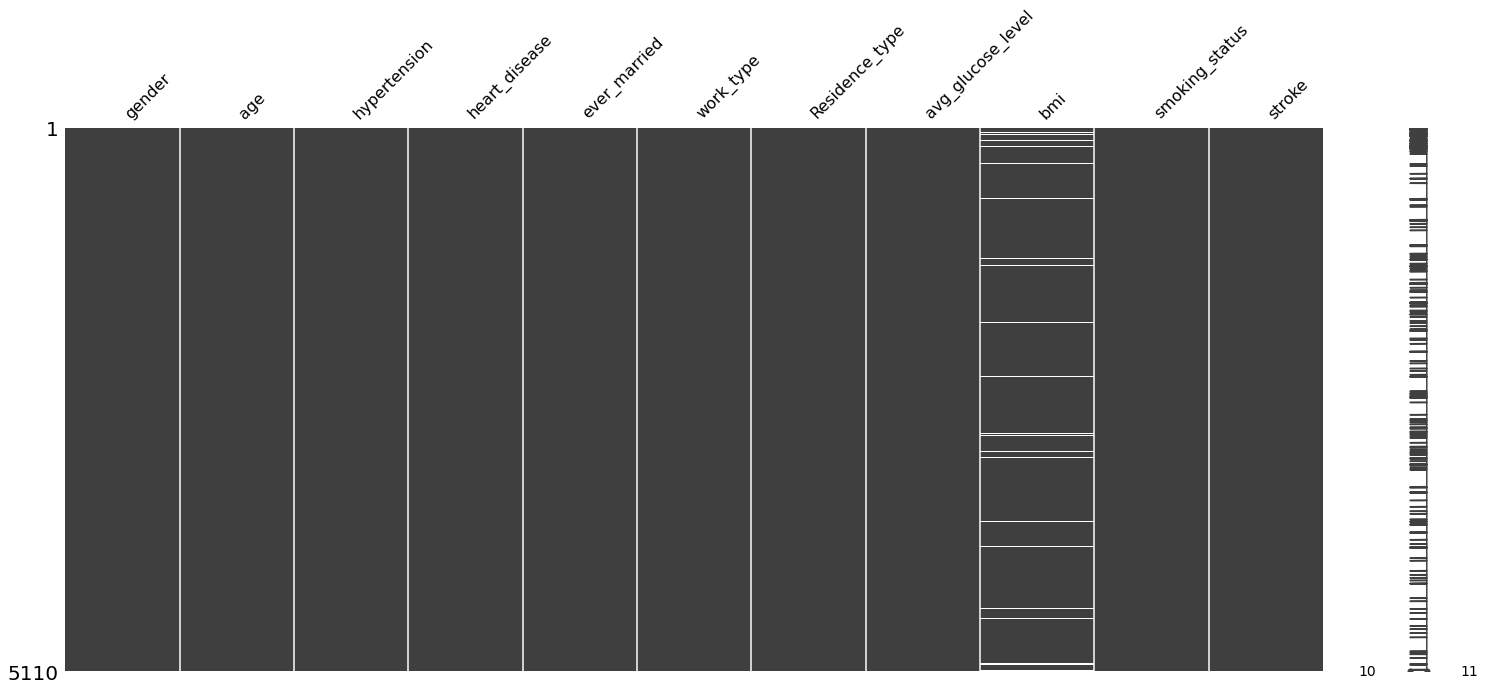

In [10]:
msno.matrix(df);

- We have missing values on the 'bmi', which is at around %4. 
- It seem that we have random missing values.
- We will handle it by using pipeline during the modeling.

-Let's see our numerical and categorical features seperately.

In [11]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

numerical = ['avg_glucose_level', 'bmi']

<a id="8"></a>
<font color="lightseagreen" size=+1.5><b>Numerical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [12]:
df[numerical].describe()

,avg_glucose_level,bmi
count,5110.000000,4909.000000
mean,106.147677,28.893237
std,45.283560,7.854067
min,55.120000,10.300000
25%,77.245000,23.500000
50%,91.885000,28.100000
75%,114.090000,33.100000
max,271.740000,97.600000


- We have two numerical features in our dataset. 

- Both of our numerical features are measured in different scales.

- Many machine learning algorithms perform better standard range scaled numerical variables (such as Linear models,artificial neural networks, K-nearest Neighbors,support vector machines, etc.) 

- Tree models (such as, decision trees,random forest, etc.) work fine with different range numerical features.

- Based on the mean & median score differences, we can expect slightly right skew on the 'bmi' (mean: 28.89 & median: 28.10)
- And right skew distribution on the 'avg_glucose_level' (mean: 106.14 & median: 91.88)

- Let's see the skewness.

### **Skewness**

In [13]:
df[numerical].skew()

avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

- Based on the result, both of the fetures have right tail, positively skewed shape distribution.

### **Univariate Analysis**

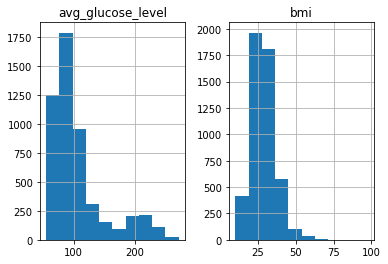

In [14]:
df[numerical].hist(figsize=(6,4));

- As seen in both skewness result and histograms, numerical features have righ skewness in different degrees.
- In case of positive skewness, and without zero values, **log transformations** usually works well.

- Before making the log transformation, let's see the correlation between them.

In [15]:
df[numerical].corr()

,avg_glucose_level,bmi
avg_glucose_level,1.000000,0.175502
bmi,0.175502,1.000000


- There is very small positive correlation between numerical features.

- Let' see their mean scores with the target variable

In [16]:
df.groupby('stroke')[numerical].mean()

,avg_glucose_level,bmi
stroke,,
0,104.795513,28.823064
1,132.544739,30.471292


- And the correlation with the target variable

In [17]:
df[['avg_glucose_level','bmi','stroke']].corr()

,avg_glucose_level,bmi,stroke
avg_glucose_level,1.000000,0.175502,0.131945
bmi,0.175502,1.000000,0.042374
stroke,0.131945,0.042374,1.000000


- Average glucose level's mean scores have differences between a person who has a stroke or not.
- Bmi mean scores are close to each other.
- Corrleations with the target variable are very small. 

- Finally let's see the scatter plot

In [18]:
fig = px.scatter(df, y='avg_glucose_level', x='bmi', title='Average Glucose Level & BMI ',color='stroke', hover_data = df[['stroke']])
fig.show()

- Before moving to the categorical variable, let's put numerical features in order.

Skewness:avg_glucose_level    0.882751
bmi                  0.001133
dtype: float64



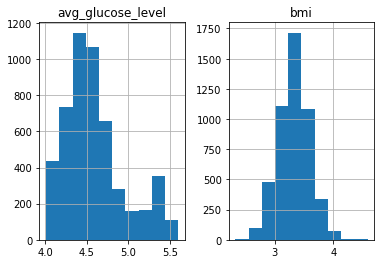

In [19]:
df[numerical] = np.log(df[numerical])
print(f'Skewness:{df[numerical].skew()}\n')
df[numerical].hist(figsize=(6,4));

In [20]:
df[numerical].describe()

,avg_glucose_level,bmi
count,5110.000000,4909.000000
mean,4.592465,3.328423
std,0.361985,0.265064
min,4.009513,2.332144
25%,4.346982,3.157000
50%,4.520538,3.335770
75%,4.736988,3.499533
max,5.604846,4.580877


- We have much better distribution than before.
- Both variables' mean and median scores are very close to each other
- Both variables are in similar ranges.
- Maximum and minum numbers are close to 25 % and 75 % quartiles.
- Log transformation did a good job on this case.

<a id="9"></a>
<font color="lightseagreen" size=+1.5><b>Categorical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

#### **Gender**

In [21]:
print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="gender", title='Gender', width=400, height=400)
fig.show()

Female    58.59
Male      41.39
Other      0.02
Name: gender, dtype: float64


- We have 2994 female and 2115 male and 1 other gender people.

#### Hypertension

In [22]:
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="hypertension", title='hypertension', width=400, height=400)
fig.show()

0    90.25
1     9.75
Name: hypertension, dtype: float64


- We have 498 patient with hypertension which represents at raound 10 % of the sample.

#### Heart Disease

In [23]:
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="heart_disease", title='heart_disease', width=400, height=400)
fig.show()

0    94.6
1     5.4
Name: heart_disease, dtype: float64


- We have 276 patient with heart disease which is 5.4 % of the sample.

#### Married

In [24]:
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="ever_married", title='ever_married', width=400, height=400)
fig.show()

Yes    65.62
No     34.38
Name: ever_married, dtype: float64


- 3353 people have been married and 1757 people are not married before.

#### Work Type

In [25]:
print (f'{round(df["work_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="work_type", title='work_type', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: work_type, dtype: float64


- 2925 people work in the private sector.
- 819 people are self-employed
- 657 people work at the government job.


#### Residence Type

In [26]:
print (f'{round(df["Residence_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="Residence_type", title='Residence_type', width=400, height=400)
fig.show()

Urban    50.8
Rural    49.2
Name: Residence_type, dtype: float64


- 2596 people live in the urban area
- 2514 people live in the rural area

#### Smoking

In [27]:
print (f'{round(df["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="smoking_status", title='smoking_status', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: smoking_status, dtype: float64


- 1892 people are never smoked
- 789 people smoke

<a id="10"></a>
<font color="lightseagreen" size=+1.5><b>Bivariate Analysis</b></font>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


#### **Hypertension & Stroke**

In [28]:
print (f'A person with hypertension has a probability of {round(df[df["hypertension"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without hypertension has a probability of  {round(df[df["hypertension"]==0]["stroke"].mean()*100,2)} % get a stroke')



A person with hypertension has a probability of 13.25 % get a stroke

A person without hypertension has a probability of  3.97 % get a stroke


In [29]:
fig = px.histogram(df, x="hypertension", color="stroke",width=400, height=400)
fig.show()

- As we have seen, stroke probability for those who has hypertension are quite different than for those who don't.
- %13.2 and %3.9 respectively
- It means that **person with hypertension are almost 3.3 time more likely to get stroke than the ones who don't have hypertension**.

#### **Gender & Stroke**

In [30]:
print (f'A female person has a probability of {round(df[df["gender"]=="Female"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A male person has a probability of {round(df[df["gender"]=="Male"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person from  the other category of gender has a probability of {round(df[df["gender"]=="Other"]["stroke"].mean()*100,2)} % get a stroke')


A female person has a probability of 4.71 % get a stroke

A male person has a probability of 5.11 % get a stroke

A person from  the other category of gender has a probability of 0.0 % get a stroke


In [31]:
fig = px.histogram(df, x="gender", color="stroke",width=400, height=400)
fig.show()

- **Male compare to female are more likelyto get stroke, but difference between female and male is very small.**

#### **Heart Disease & Stroke**

In [32]:
print (f'A person with heart disease has a probability of {round(df[df["heart_disease"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without heart disease has a probability of {round(df[df["heart_disease"]==0]["stroke"].mean()*100,2)} % get a stroke')


A person with heart disease has a probability of 17.03 % get a stroke

A person without heart disease has a probability of 4.18 % get a stroke


In [33]:
fig = px.histogram(df, x="heart_disease", color="stroke",width=400, height=400)
fig.show()

- As we have seen, stroke probability for those who has heart disease are quite different than for those who don't.
- % 17.03 and % 4.18 respectively
- It means that **person with heart diease are 4.07 times more likely to get stroke than the ones who don't have heart disease.**

#### **Married & Stroke**

In [34]:
print (f'A person married (or married before) has a probability of {round(df[df["ever_married"]=="Yes"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never married has a probability of {round(df[df["ever_married"]=="No"]["stroke"].mean()*100,2)} % get a stroke')


A person married (or married before) has a probability of 6.56 % get a stroke

A person never married has a probability of 1.65 % get a stroke


In [35]:
fig = px.histogram(df, x="ever_married", color="stroke",width=400, height=400)
fig.show()

- As we have seen, stroke probability for those who has marriage history are quite different than for those who don't.
- % 6.56 and % 1.65 respectively
- It means that **person is married(or married before) are 5.7 times more likely to get stroke than the ones who don't have marriage history**.

![](https://media.giphy.com/media/xT5LMzIK1AdZJ4cYW4/giphy.gif)

image credit: https://giphy.com/

#### **Work Type & Stroke**

In [36]:
print (f'A person with private work type has a probability of {round(df[df["work_type"]=="Private"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'Self-employed person has a probability of {round(df[df["work_type"]=="Self-employed"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person with a goverment job has a probability of {round(df[df["work_type"]=="Govt_job"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A child has a probability of {round(df[df["work_type"]=="children"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never worked has a probability of {round(df[df["work_type"]=="Never_worked"]["stroke"].mean()*100,2)} % get a stroke')

A person with private work type has a probability of 5.09 % get a stroke

Self-employed person has a probability of 7.94 % get a stroke

A person with a goverment job has a probability of 5.02 % get a stroke

A child has a probability of 0.29 % get a stroke

A person never worked has a probability of 0.0 % get a stroke


In [37]:
fig = px.histogram(df, x="work_type", color="stroke",width=600, height=600)
fig.show()

- If you have never worked, you will not die by stroke !!! Just kidding.

- Self employed person has more probability to get stroke than other work type.

- Person with private job and goverment job almost has same probability to get stroke.

#### **Residence Type & Stroke**

In [38]:
print (f'A person, who lives in urban area, has a probability of {round(df[df["Residence_type"]=="Urban"]["stroke"].mean()*100,2)} %  get a stroke')

print()

print (f'A person, who lives in rural area, has a probability of {round(df[df["Residence_type"]=="Rural"]["stroke"].mean()*100,2)} % get a stroke')


A person, who lives in urban area, has a probability of 5.2 %  get a stroke

A person, who lives in rural area, has a probability of 4.53 % get a stroke


In [39]:
fig = px.histogram(df, x="Residence_type", color="stroke",width=400, height=400)
fig.show()

- As seen, there is not much difference between person residence type.
- Person who lives in rural area slightly has more probablity to get sroke than a person who lives in rural area. Difference is small.

#### **Smoking & Stroke**

In [40]:
print (f'A formerly smoked person has a probability of {round(df[df["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never smoked has a probability of {round(df[df["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person smokes has a probability of {round(df[df["smoking_status"]=="smokes"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person whom smoking history is not known,has a probability of {round(df[df["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)} % get a stroke')

print()

A formerly smoked person has a probability of 7.91 % get a stroke

A person never smoked has a probability of 4.76 % get a stroke

A person smokes has a probability of 5.32 % get a stroke

A person whom smoking history is not known,has a probability of 3.04 % get a stroke



In [41]:
fig = px.histogram(df, x="smoking_status", color="stroke",width=600, height=600)
fig.show()

- There are differeneces based on the smoking habits.
- A formerly smoked person has a probability to get stroke 1.66 times more than person never smoked.
- A person smokes has a a probability to get stroke 1.11 times more than person never smoked.
- It is smal difference between who smokes and who does not smoke in regard to probability of getting stroke.

<a id="11"></a>
<font color="lightseagreen" size=+1.5><b>Insights from the Exploratory Data Analysis</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Average glucose level's mean scores on the target have differences between a person who has a stroke or not. But this differences are small.
- BMI does not have any significant relationship with the target variable. 
- **A person with hypertension are almost 3.3 time more likely to get stroke than the ones who don't have hypertension**.
- Male compare to female are more likelyto get stroke, but difference between female and male is very small.
- **A person with heart diease are 4.07 times more likely to get stroke than the ones who don't have heart disease.**
- **A person is married(or married before) are 5.7 times more likely to get stroke than the ones who don't have marriage history**.
- Self employed person has more probability to get stroke than other work type. Be carefull !!!
- Person who lives in rural area slightly has more probablity to get sroke than a person who lives in rural area. Difference is small.
- It is smal difference between who smokes and who does not smoke in regard to probability of getting stroke.




<a id="12"></a>
<font color="lightseagreen" size=+2.5><b>MODEL SELECTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

![](https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs42003-019-0440-4/MediaObjects/42003_2019_440_Fig1_HTML.png)

image credit: https://www.nature.com

#### Below code-snippets are mostly generated through https://machinelearningmastery.com. I have made changes and modified them to adjust to the problem at hand.

Reference : https://machinelearningmastery.com



- We will go step by step.
  - We will load the data
  - Then first we decide our evaluation method
  - Then we will make baseline algorithm to give us lower limit
  - Then we define our models
  - We make our pipeline
  - Analyze the models by evaluation results and boxplot.
  - Decide which model perform the best in the evaluated models.
  - We try to improve oour models.


- Let's start.


<a id="13"></a>
<font color="lightseagreen" size=+1.5><b>Load the Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [42]:
# def load_data (df):
  #  df=df.drop('id', axis=1)
   # categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
   # numerical = ['avg_glucose_level', 'bmi']
   # df[numerical] = np.log(df[numerical])
   # y= df['stroke']
   # X = df.drop('stroke', axis=1)
   # cat = X.select_dtypes(include=['object', 'bool']).columns
   # ct = ColumnTransformer([('o',OneHotEncoder(),cat)], remainder='passthrough')
   # X = ct.fit_transform(X)
   # return X,y

- We will design and test several models, for that reason, each time we will start fresh with the data load.
- First we drop the 'id' column, which is not useful for our model.
- We defined, categorical and numerical columns.
- We made log transformation on the positively skewed and non zero value numerical features.
- We defined our target variable and our features.
- We encoded categorical variable in a manner to work with our machine learning algorithms.
- We fit and transform them to use in our models.

<a id="14"></a>
<font color="lightseagreen" size=+1.5><b>Our Evaluation Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [43]:
# def evaluate_model(X, y, model):
  #  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
   # scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    # return scores



- K fold repeated stratified cross validation will be our evaluation tool for our proposed models.
- 10 fold (n_splits=10) will be hold our instances.
- Each fold will hold sample size / number of fold (5110 / 10) 511 instances.
- Stratified version of k fold would be used to ensure both stroke and no stroke would be represented as their representation in the sample.
- Each fold would have 5 % stroke and 95 % no stroke instances.
- Better capture the variance of the chosen model, k fold evaluation process would be repeated 3 times. (n_repeats=3)
- In a more detailed explanation: Each model will be evaluated n_splits * n_repeats time (10*3 =30) and the mean and standard deviation of these repeatations will be reported.
- Models will be  evaluated and compared by using the area under ROC Curve or ROC AUC.

<a id="15"></a>
<font color="lightseagreen" size=+1.5><b>Baseline Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [44]:
#def load_data (df):
 #   df=df.drop('id', axis=1)
  #  categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
   # numerical = ['avg_glucose_level', 'bmi']
   # df[numerical] = np.log(df[numerical])
    #y= df['stroke']
    #X = df.drop('stroke', axis=1)
    #cat = X.select_dtypes(include=['object', 'bool']).columns
    #ct = ColumnTransformer([('o',OneHotEncoder(),cat)], remainder='passthrough')
    #X = ct.fit_transform(X)
    #return X,y


#def baseline_model(X, y, model):
 #   imputer = SimpleImputer(strategy='median')
  #  model = DummyClassifier(strategy='constant', constant=1)
   # pipeline = Pipeline(steps=[('imputer', imputer),('model', model)])
   # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
   # scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
   # return scores

# df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
#X,y= load_data(df)
# model = DummyClassifier(strategy='constant', constant=1)
# scores = baseline_model(X, y, model)
# print('Mean roc_auc: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

- As name states, this our baseline model. 
- Any model gets better score than baseline has skill on our problem.
- Any model gets lower score than baseline model, does not have skill on our problem.

<a id="16"></a>
<font color="lightseagreen" size=+1.5><b>Our Models</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [45]:
#def get_models():
 #   models, names = list(), list()
  #  models.append(LogisticRegression(solver='liblinear'))    
   # names.append('LR')
   # models.append(LinearDiscriminantAnalysis())
   # names.append('LDA')
   # models.append(SVC(gamma='scale'))
   # names.append('SVM')
   # models.append(RandomForestClassifier(n_estimators=1000))
   # names.append('RF')
   # models.append(GaussianNB())
   # names.append('NB')
   # return models, names

- First we have two list to contain models and their names
- We decide to use several different Machine Learning classification algorithms.
- We have defined them

<a id="17"></a>
<font color="lightseagreen" size=+1.5><b>Analyze the Models</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [46]:
# for i in range(len(models)):
  #  imputer = SimpleImputer(strategy='median')  
   # pipeline = Pipeline(steps=[('imputer', imputer), ('m', models[i])])    
   # scores = evaluate_model(X, y, pipeline)
   # results.append(scores)

- In order to evaluate each model, we use for loop.
- As  we have seen in the exploratory data nalysis part, our dataset has missing values.
- Most of the machine learning algorithms do not work with the missing values.
- We have decided to use median imputation.
- To avoid data leakage we impute the missing values by using pipeline.
- By using pipleline, model first impute the missing values in the training data and then repeat the process with the test data.
- By using evaluate model function we have defined before, we evaluate each model and save their scores into score list.
- By evaluating each model we will find out which algorithm works well with the problem in hand.
- After finding the best algorithm, we will look deeper on that algorithm. 

<a id="18"></a>
<font color="lightseagreen" size=+1.5><b>Visualize the Results</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [47]:
# plt.boxplot(results, labels=names, showmeans=True)
# plt.show()

- After getting results, we will look at each Machine Learning algorithm by using box and whisker plots.

<a id="19"></a>
<font color="lightseagreen" size=+1.5><b> Our First Model </b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

>LR 0.836 (0.032)
>LDA 0.834 (0.030)
>SVM 0.585 (0.086)


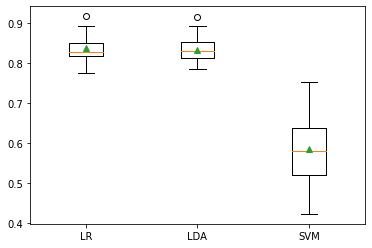

In [48]:
def load_data (df):
    df=df.drop('id', axis=1)
    categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
    numerical = ['avg_glucose_level', 'bmi']
    df[numerical] = np.log(df[numerical])
    y= df['stroke']
    X = df.drop('stroke', axis=1)
    cat = X.select_dtypes(include=['object', 'bool']).columns
    ct = ColumnTransformer([('o',OneHotEncoder(),cat)], remainder='passthrough')
    X = ct.fit_transform(X)
    return X,y


def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))    
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names

df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
X,y= load_data(df)
models, names = get_models()
results = list()

for i in range(len(models)):
    imputer = SimpleImputer(strategy='median')  
    pipeline = Pipeline(steps=[('imputer', imputer), ('m', models[i])])    
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

- The results suggest that logistic regression achieves a slightly better score than Linear Discriminant Analysis. 
- The distribution between the two top-performing models appears roughly equivalent, LR gets a slightly bigger mean score than LDA.
-  A box and whisker plot is created summarizing the distribution of results. 
- All methods sshow skill on the problem., 
- SVM gave the worst performance, but let's see in our second model, how it performs?

<a id="20"></a>
<font color="lightseagreen" size=+1.5><b> Our Second Model with SMOTE </b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

>LR 0.834 (0.029)
>LDA 0.838 (0.029)
>SVM 0.833 (0.034)


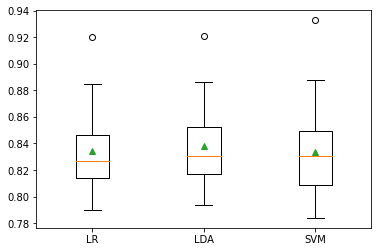

In [49]:
from imblearn.pipeline import Pipeline

def load_data (df):
    df=df.drop('id', axis=1)
    categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
    numerical = ['avg_glucose_level', 'bmi']
    df[numerical] = np.log(df[numerical])
    y= df['stroke']
    X = df.drop('stroke', axis=1)
    cat = X.select_dtypes(include=['object', 'bool']).columns
    ct = ColumnTransformer([('o',OneHotEncoder(),cat)], remainder='passthrough')
    X = ct.fit_transform(X)
    return X,y


def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))    
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names

df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
X,y= load_data(df)
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    imputer = SimpleImputer(strategy='median')  
    pipeline = Pipeline(steps=[('imputer', imputer),('over', SMOTE()), ('m', models[i])])    
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

- As we have mentioned before, we have imbalanced data and majority class (no stroke) oversamples the examples.
- To deal with we used stratified method to get percentages same in the examples (5% & 95%)
- Synthetic Minority Oversampling Technique (SMOTE) deals with the imbalanced data by adding random minority class instances ( a stroke) by using k nearest (a stroke) neighbor.
- In our second model we used SMOTE technique and increased the minority class representation to the same level with the majority class (no stroke)

- There is a significant jump on the SVM (from .588 to .833). 
- Very small changes on the LR and LDA 
- All methods still show skill on the problem. 


<a id="21"></a>
<font color="darkblue" size=+1.5><b>Conclusion</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


- We have developed model to predict classification problem.

- First, we  made the detailed exploratory analysis.
- We have decided which metric to use.
- We analyzed both target and features in detail.
- We transform categorical variables into numeric so we can use them in the model.
- We transform numerical variables to reduce skewness and get close to normal  distribution.
- We define our functions to use in our model.
- We use cross validation model to evaluate our models.
- We use pipeline to avoid data leakage.
- We looked at the results of the each model and selected the best one for the problem in hand.
- We have seen two different methods to use when developing model on the imbalanced data.

- After this point it is up to you to develop and improve the models.  **Enjoy** 🤘

![](https://media.giphy.com/media/6pUbJKgj2nI3GDytPN/giphy.gif)

#### By the way, when you like the topic, you can show it by supporting 👍

####  **Feel free to leave a comment**. 

#### All the best 🤘

<a id="22"></a>
<font color="darkblue" size=+1.5><b>References & Further Reading</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


[Machine Learning - Beginner &Intermediate-Friendly BOOKS](https://www.kaggle.com/general/255972)